In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\ml_dataset\\ml_project\\NLP\\train.csv')
df.shape

(404290, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [5]:
df['question2'][0]

'What is the step by step guide to invest in share market?'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot: >

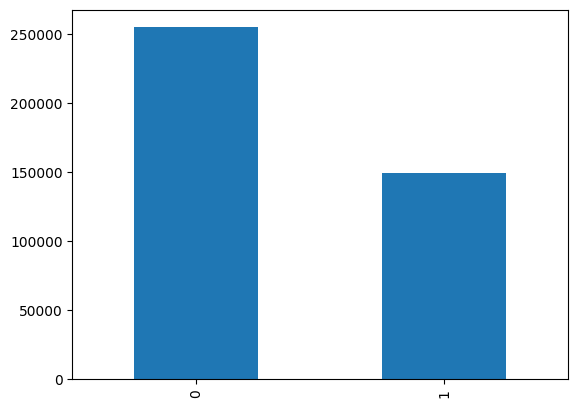

In [9]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique question',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique question 537933
Number of questions getting repeated 111780


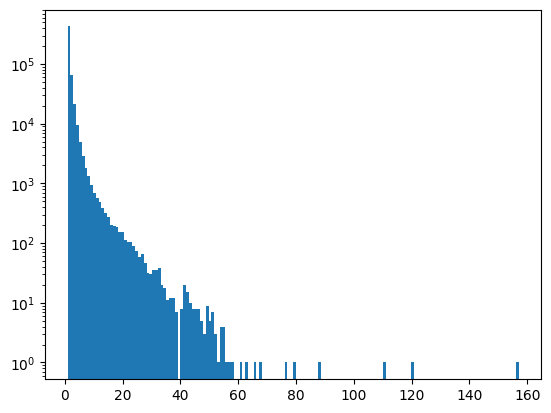

In [11]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [12]:
new_df =df.sample(30000)

In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)

0    18768
1    11232
Name: is_duplicate, dtype: int64
0    62.56
1    37.44
Name: is_duplicate, dtype: float64


In [15]:
df.duplicated().sum()

0

In [16]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique question',np.unique(qid).shape[0])
y = qid.value_counts()>1
print('Number of questions getting repeated',y[y].shape[0])

Number of unique question 55345
Number of questions getting repeated 3466


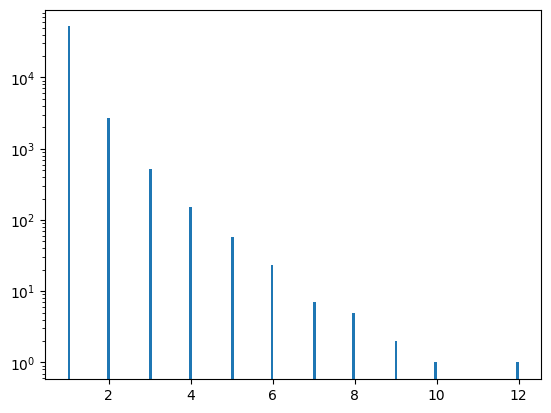

In [17]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [18]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
202533,How did the coefficients of kinetic friction c...,How do I use the coefficient of kinetic friction?
227200,How to run WhatsApp on PC without BlueStacks,What are the ways to use Whatsapp on pc other ...
324286,What are your thoughts on what is happening in...,"What is happening in Aleppo, Syria?"
355226,How do I get rid of the last bit of belly fat?,What are the best ways to reduce and eliminate...
237185,How do I unfollow people on Quora?,What are some reasons to unfollow people on Qu...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [20]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [21]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
202533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89090,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
202533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
324286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7426666666666667

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7288333333333333

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7033333333333334